# Chapter 3: Estimating Expected Returns and Covariances

## 3.1 Estimating Expected Returns

## Listing 3.1

In [1]:
import yfinance as yf

df = yf.download("AAPL", start='2000-01-03', end='2023-12-30')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800


In [2]:
stocks = ['AAPL', 'FE', 'WMT']
stock_prices = yf.download(stocks, start='2000-01-03', end='2023-12-30')['Adj Close']
stock_prices.head()

[*********************100%***********************]  3 of 3 completed


,AAPL,FE,WMT
Date,,,
2000-01-03,0.847207,7.525705,43.555920
2000-01-04,0.775779,7.525705,41.926163
2000-01-05,0.787131,7.802859,41.070534
2000-01-06,0.719014,7.824178,41.518715
2000-01-07,0.753073,7.866814,44.656036


In [3]:
stock_returns = stock_prices.pct_change()
stock_returns.head()

,AAPL,FE,WMT
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.084310,0.000000,-0.037418
2000-01-05,0.014633,0.036828,-0.020408
2000-01-06,-0.086538,0.002732,0.010912
2000-01-07,0.047369,0.005449,0.075564


In [4]:
stock_returns.mean()*252

AAPL    0.306962
FE      0.099765
WMT     0.081381
dtype: float64

## Listing 3.2

In [5]:
import pandas_datareader as pdr

rf = pdr.DataReader('TB3MS', 'fred', start='2000-01-01', end='2023-12-30')
rf.head()

,TB3MS
DATE,
2000-01-01,5.32
2000-02-01,5.55
2000-03-01,5.69
2000-04-01,5.66
2000-05-01,5.79


In [8]:
mkt_prices = yf.download('SPY', start='2000-01-03', end='2023-12-30')['Adj Close']

[*********************100%***********************]  1 of 1 completed


## Listing 3.3

In [23]:
import statsmodels.api as sm

stock_prices_monthly = stock_prices.resample('MS').first()
mkt_prices_monthly = mkt_prices.resample('MS').first()
aapl_returns_monthly = stock_prices_monthly['AAPL'].pct_change()
mkt_returns_monthly = mkt_prices_monthly.pct_change()
y = (aapl_returns_monthly - rf['TB3MS']/100/12).dropna()
X = (mkt_returns_monthly - rf['TB3MS']/100/12).dropna()
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.304
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              124.7
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                    2.94e-24
Time:                        20:13:44   Log-Likelihood:                          260.62
No. Observations:                 286   AIC:                                     -519.2
Df Residuals:                     285   BIC:                                     -515.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
print('The beta for AAPL is: ', results.params)

The beta for AAPL is:  x1    1.3187
dtype: float64


The beta for FE:

In [20]:
fe_returns_monthly = stock_prices_monthly['FE'].pct_change()
y = (fe_returns_monthly - rf['TB3MS']/100/12).dropna()
model = sm.OLS(y,X)
results = model.fit()
print('The beta for FE is: ', results.params)

The beta for FE is:  x1    0.295832
dtype: float64


The beta for WMT:

In [22]:
wmt_returns_monthly = stock_prices_monthly['WMT'].pct_change()
y = (wmt_returns_monthly - rf['TB3MS']/100/12).dropna()
model = sm.OLS(y,X)
results = model.fit()
print('The beta for WMT is: ', results.params)

The beta for WMT is:  x1    0.490691
dtype: float64


In [25]:
print('The current risk-free rate is', rf['TB3MS'].iloc[-1],'%')

The current risk-free rate is 5.27 %


In [26]:
print('The avg annualized market return is', mkt_returns_monthly.mean()*12*100, '%')

The avg annualized market return is 8.074061473869964 %


## Listing 3.4

raw bond average returns  0.09673030238651532
excess bond average returns  0.06364354439564762


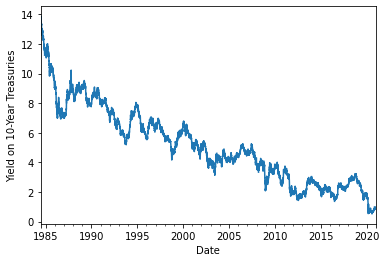

In [32]:
start = '1984-06-29'
end = '2020-12-31'
symbol = 'BAMLCC8A015PYTRIV'

bond = pdr.DataReader(symbol, 'fred', start=start, end=end) #A
bond_monthly = bond.resample('M').last()
bond_returns_monthly = bond_monthly.pct_change()

TenYr = pdr.DataReader('DGS10', 'fred', start='1984-06-29', end='2020-12-31') #B
TenYr_monthly = TenYr.resample('M').last()
TenYr_change_monthly = TenYr_monthly.diff().dropna()/100.
TenYr_change_monthly.rename(columns={'DGS10': 'Change 10Yr Yield'}, inplace=True)

rf = pdr.DataReader('DTB3', 'fred', start='1984-06-29', end='2020-12-31') #C
rf_monthly = rf.resample('M').last()/100

TenYr.plot(xlabel='Date', ylabel='Yield on 10-Year Treasuries', legend=False) #D

print('raw bond average returns ', bond_returns_monthly[symbol].mean()*12)
print('excess bond average returns ', (bond_returns_monthly[symbol] -
                                       rf_monthly['DTB3'].shift()/12).mean()*12)

#A Download corporate bond data
#B Download Treasury yield data
#C Download short-term risk-free rate data
#D The plot of Treasury yields displayed in Figure 3.2

## Listing 3.5

In [33]:
y = (bond_returns_monthly[symbol] - rf_monthly['DTB3'].shift()/12).dropna()
X = TenYr_change_monthly
X = sm.add_constant(X)
common_dates = X.index.intersection(y.index)
X = X.loc[common_dates]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     364.4
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.72e-59
Time:                        17:01:29   Log-Likelihood:                 1123.3
No. Observations:                 438   AIC:                            -2243.
Df Residuals:                     436   BIC:                            -2234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0036      0.00

In [34]:
print('The expected return after stripping out valuation is ',results.params[0]*12)

The expected return after stripping out valuation is  0.04261614539214154


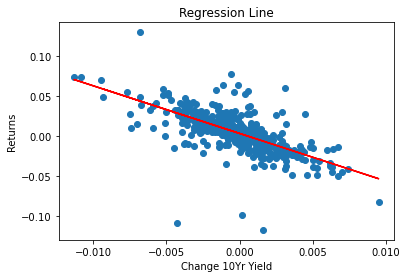

In [36]:
# Plot the regression line
import matplotlib.pyplot as plt

plt.plot(X['Change 10Yr Yield'], results.fittedvalues, color='red')
plt.scatter(X['Change 10Yr Yield'], y)
plt.xlabel('Change 10Yr Yield')
plt.ylabel('Returns')
plt.title('Regression Line')
plt.show()

## Listing 3.6

In [40]:
start = '1983-01-01'
end = '2023-01-01'

stock = yf.download('VFINX', start=start, end=end)
stock_annual = stock.resample('AS').first()
stock_returns_annual = stock_annual['Adj Close'].pct_change()

CAPE = pd.read_excel('ie_data.xls', sheet_name='Data',
usecols=['Date', 'CAPE'], skiprows=7) #A
CAPE = CAPE.dropna()
CAPE['Year'] = CAPE['Date'].astype(int) #B
CAPE['Month'] = round(100*(CAPE['Date']-CAPE['Year'])).astype(int) #C
CAPE['Year'] = CAPE['Year'].astype(str)
CAPE['Month'] = CAPE['Month'].astype(str)
CAPE['Date'] = CAPE['Year']+'-'+CAPE['Month']+'-'+'01'
CAPE = CAPE.set_index('Date')
CAPE.index = pd.to_datetime(CAPE.index, format='%Y-%m-%d')
CAPE.drop(columns=['Year', 'Month'], inplace=True)
CAPE = CAPE.resample('AS').first()
CAPE['CAPE_returns'] = CAPE['CAPE'].pct_change()

rf = pdr.DataReader('DTB3', 'fred', start=start, end=end)
rf_annual = rf.resample('AS').first()/100

print('raw stock average returns ',stock_returns_annual.mean())
print('excess stock average returns ', (stock_returns_annual -
                             rf_annual['DTB3'].shift()).mean())

#A Read Excel file with CAPE data
#B The year is the integer part of the date
#C The month is the decimal part of the date

[*********************100%***********************]  1 of 1 completed
raw stock average returns  0.12596751294714978
excess stock average returns  0.09098289756253443


## Listing 3.7

In [42]:
y = (bond_returns_monthly[symbol] - rf_monthly['DTB3'].shift()/12).dropna()
X = TenYr_change_monthly
X = sm.add_constant(X)
common_dates = X.index.intersection(y.index)
X = X.loc[common_dates]
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     364.4
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.72e-59
Time:                        08:08:53   Log-Likelihood:                 1123.3
No. Observations:                 438   AIC:                            -2243.
Df Residuals:                     436   BIC:                            -2234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0036      0.00

## 3.2 Estimating Variances and Covariances

In [12]:
stock_returns.std() * (252**0.5)

AAPL    0.392659
FE      0.258756
WMT     0.235451
dtype: float64

In [13]:
stock_returns.corr()

,AAPL,FE,WMT
AAPL,1.000000,0.209247,0.261399
FE,0.209247,1.000000,0.265760
WMT,0.261399,0.265760,1.000000


In [14]:
stock_returns.cov() * 252

,AAPL,FE,WMT
AAPL,0.154181,0.021260,0.024167
FE,0.021260,0.066955,0.016191
WMT,0.024167,0.016191,0.055437


In [15]:
import pandas as pd
import numpy as np

# Download S&P500 prices around the 1987 stock market crash
SP500 = yf.download('^GSPC', start='1987-10-07', end='1987-10-31', progress=False)['Close']

# Convert Series to a DataFrame and add a column for Percent Change
SP500 = pd.DataFrame(SP500)
SP500['% Change'] = SP500['Close'].pct_change()*100
SP500 = SP500.dropna()
SP500

,Close,% Change
Date,,
1987-10-08,314.160004,-1.375025
1987-10-09,311.070007,-0.983574
1987-10-12,309.390015,-0.540069
1987-10-13,314.519989,1.658093
1987-10-14,305.230011,-2.953700
1987-10-15,298.079987,-2.342504
1987-10-16,282.700012,-5.159680
1987-10-19,224.839996,-20.466931
1987-10-20,236.830002,5.332684


## Listing 3.8

In [16]:
SP500 = yf.download('^GSPC', start='1987-01-01', end='2022-05-10')
SP500['Ret'] = SP500['Close'].pct_change()
SP500['Sq Ret'] = SP500['Ret']**2
AutoCorr = SP500['Sq Ret'].autocorr()
se = 1/(len(SP500)**0.5)
t_stat = AutoCorr/se

print('The autocorrelation of squared returns is', AutoCorr)
print('The standard error is', se)
print('The t-stat is', t_stat)

[*********************100%***********************]  1 of 1 completed
The autocorrelation of squared returns is 0.2227757373184402
The standard error is 0.010594028769395471
The t-stat is 21.028424801148855


[*********************100%***********************]  1 of 1 completed


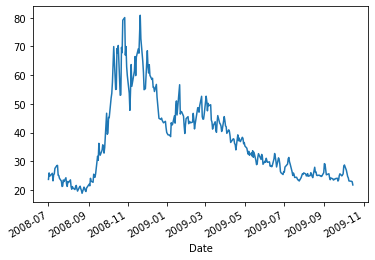

In [17]:
VIX = yf.download('^VIX', start='2008-07-01', end='2009-10-16')['Close']
VIX.plot();

## Listing 3.9

In [22]:
from arch import arch_model

AAPL_prices = yf.download('AAPL', start='2000-01-03', end='2022-05-24')['Adj Close']
returns = 100 * AAPL_prices.pct_change().dropna()

horizon = 63
am = arch_model(returns)
res = am.fit()
forecasts = res.forecast(horizon=horizon)
print(forecasts.residual_variance.iloc[-1,:])

[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1938171.2885153533
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2981167.500528286
Iteration:      3,   Func. Count:     22,   Neg. LLF: 12379.129621485232
Iteration:      4,   Func. Count:     28,   Neg. LLF: 12359.908511889305
Iteration:      5,   Func. Count:     34,   Neg. LLF: 12486.390942197875
Iteration:      6,   Func. Count:     40,   Neg. LLF: 12285.697489291702
Iteration:      7,   Func. Count:     46,   Neg. LLF: 12297.379174618887
Iteration:      8,   Func. Count:     52,   Neg. LLF: 12785.566919480692
Iteration:      9,   Func. Count:     59,   Neg. LLF: 12279.134335386789
Iteration:     10,   Func. Count:     65,   Neg. LLF: 12278.746221561281
Iteration:     11,   Func. Count:     70,   Neg. LLF: 12278.745316517558
Iteration:     12,   Func. Count:     74,   Neg. LLF: 12278.745316517547
Optimization terminated successfully    (Exit mode 0)
  

C:\Users\reide\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [25]:
vol_forecast = (forecasts.residual_variance.iloc[-1,:].sum()*252/horizon)**0.5 / 100
print('Volatility forecast is ', vol_forecast)

Volatility forecast is  0.48972859539572494


In [31]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.54,h.55,h.56,h.57,h.58,h.59,h.60,h.61,h.62,h.63
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
Corr = [[ 1. ,  0.8, -0.2],
        [ 0.8,  1. ,  0.5],
        [-0.2,  0.5,  1. ]]
eigenvalues = np.linalg.eigvals(Corr)
print(np.all(eigenvalues > 0))

False


In [38]:
eigenvalues > 0

array([False,  True,  True])

In [36]:
Corr = [[ 1. ,  0.8, -0.2],
        [ 0.8,  1. ,  0.4],
        [-0.2,  0.4,  1. ]]
eigenvalues = np.linalg.eigvals(Corr)
print(np.all(eigenvalues > 0))

True
